# EOD Historical Data - Equity and Stock Data
> ## Advanced data surces!

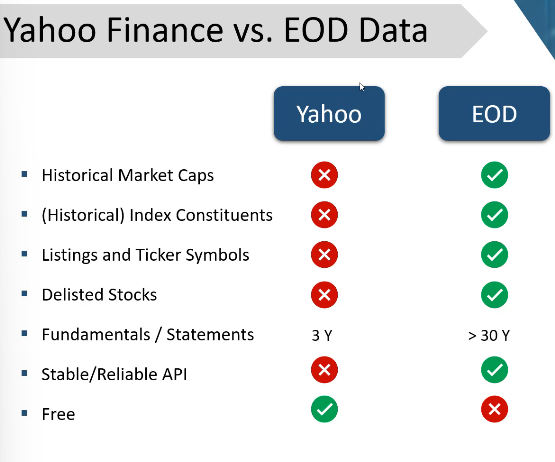

In [3]:
# pip install eod

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# eod  is a state-based interface to matplotlib. 
# It provides an implicit, MATLAB-like, way of plotting.
# It also opens figures on your screen, and acts as the figure GUI manager
from eod import EodHistoricalData

In [5]:
token = "demo" # free demo

In [6]:
client = EodHistoricalData(token)
client

In [7]:
symbol = "AAPL.US" #works with free Demo

__Historical Price Data__ (unadjusted)

In [8]:
# Get the historical price data of AAPL, since 1980 !! 
df = pd.DataFrame(client.get_prices_eod(symbol, period = "d"))
df

,date,open,high,low,close,adjusted_close,volume
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0993,469033600
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,0.0942,175884800
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,0.0872,105728000
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,0.0894,86441600
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,0.0920,73449600
...,...,...,...,...,...,...,...
10816,2023-11-07,179.1800,182.4400,178.9700,181.8200,181.5808,70530000
10817,2023-11-08,182.3500,183.4500,181.5900,182.8900,182.6494,49340300
10818,2023-11-09,182.9600,184.1200,181.8100,182.4100,182.1700,53763500
10819,2023-11-10,183.9700,186.5700,183.5300,186.4000,186.4000,66133400


Note: 
- adjusted_close is adjusted for __stock splits and dividends__
- open, high, low, close are __not adjusted at all__

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10821 entries, 0 to 10820
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10821 non-null  object 
 1   open            10821 non-null  float64
 2   high            10821 non-null  float64
 3   low             10821 non-null  float64
 4   close           10821 non-null  float64
 5   adjusted_close  10821 non-null  float64
 6   volume          10821 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 591.9+ KB


In [10]:
# Set the date as datetime object. 
df.index = pd.to_datetime(df.date)
df.drop(columns = "date", inplace = True)
df

,open,high,low,close,adjusted_close,volume
date,,,,,,
1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0993,469033600
1980-12-15,27.3728,27.3728,27.2608,27.2608,0.0942,175884800
1980-12-16,25.3792,25.3792,25.2448,25.2448,0.0872,105728000
1980-12-17,25.8720,26.0064,25.8720,25.8720,0.0894,86441600
1980-12-18,26.6336,26.7456,26.6336,26.6336,0.0920,73449600
...,...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,181.5808,70530000
2023-11-08,182.3500,183.4500,181.5900,182.8900,182.6494,49340300
2023-11-09,182.9600,184.1200,181.8100,182.4100,182.1700,53763500


---

# Historical Prices - more options

In [11]:
client

In [12]:
# weekly
pd.DataFrame(client.get_prices_eod(symbol, period = "w")) 

,date,open,high,low,close,adjusted_close,volume
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,0.0993,469033600
1,1980-12-15,27.3728,28.3808,25.2448,28.2464,0.0976,490134400
2,1980-12-22,29.6352,35.6160,29.6352,35.5040,0.1227,187891200
3,1980-12-29,35.9968,36.1312,34.1152,34.4960,0.1192,219452800
4,1981-01-05,33.8688,33.8688,30.2400,31.8752,0.1101,197904000
...,...,...,...,...,...,...,...
2236,2023-10-16,176.7500,179.0800,172.6400,172.8800,172.6525,288323000
2237,2023-10-23,170.9100,174.0100,165.6700,168.2200,167.9987,286078100
2238,2023-10-30,169.0200,177.7800,167.9000,176.6500,176.4176,310010400
2239,2023-11-06,176.3800,186.5700,176.2100,186.4000,186.4000,303608500


In [13]:
# monthly
pd.DataFrame(client.get_prices_eod(symbol, period = "m")) 

,date,open,high,low,close,adjusted_close,volume
0,1980-12-12,28.7392,36.1312,25.2448,34.1152,0.1179,1344851200
1,1981-01-02,34.4960,34.7424,28.2464,28.2464,0.0976,608988800
2,1981-02-02,26.7456,28.8736,23.7440,26.4992,0.0916,321619200
3,1981-03-02,26.6336,26.9920,21.6160,24.5056,0.0847,700716800
4,1981-04-01,24.3712,29.3664,24.2592,28.3808,0.0981,536928000
...,...,...,...,...,...,...,...
511,2023-07-03,193.7800,198.2300,186.6000,196.4500,195.9270,996066400
512,2023-08-01,196.2400,196.7300,171.9600,187.8700,187.6228,1322439400
513,2023-09-01,189.4900,189.9800,167.6200,171.2100,170.9847,1337586600
514,2023-10-02,171.2200,182.3400,165.6700,170.7700,170.5453,1172719600


In [14]:
# from specific start date
pd.DataFrame(client.get_prices_eod(symbol, period = "d", from_ = "2022-07-01"))

,date,open,high,low,close,adjusted_close,volume
0,2022-07-01,136.04,139.04,135.66,138.93,137.7376,71051600
1,2022-07-05,137.77,141.61,136.93,141.56,140.3451,73353800
2,2022-07-06,141.35,144.12,141.08,142.92,141.6934,74064300
3,2022-07-07,143.29,146.55,143.28,146.35,145.0940,66253700
4,2022-07-08,145.26,147.55,145.00,147.04,145.7780,64547800
...,...,...,...,...,...,...,...
340,2023-11-07,179.18,182.44,178.97,181.82,181.5808,70530000
341,2023-11-08,182.35,183.45,181.59,182.89,182.6494,49340300
342,2023-11-09,182.96,184.12,181.81,182.41,182.1700,53763500
343,2023-11-10,183.97,186.57,183.53,186.40,186.4000,66133400


In [15]:
# start & end date
pd.DataFrame(client.get_prices_eod(symbol, period = "d", from_ = "2022-07-01", to = "2022-09-30")) 

,date,open,high,low,close,adjusted_close,volume
0,2022-07-01,136.04,139.04,135.66,138.93,137.7376,71051600
1,2022-07-05,137.77,141.61,136.93,141.56,140.3451,73353800
2,2022-07-06,141.35,144.12,141.08,142.92,141.6934,74064300
3,2022-07-07,143.29,146.55,143.28,146.35,145.0940,66253700
4,2022-07-08,145.26,147.55,145.00,147.04,145.7780,64547800
...,...,...,...,...,...,...,...
59,2022-09-26,149.66,153.77,149.64,150.77,149.6837,93339400
60,2022-09-27,152.74,154.72,149.95,151.76,150.6665,84442700
61,2022-09-28,147.64,150.64,144.84,149.84,148.7604,146691400
62,2022-09-29,146.10,146.72,140.68,142.48,141.4534,128138200


In [16]:
# reverse order
pd.DataFrame(client.get_prices_eod(symbol, period = "d", from_ = "2022-07-01", to = "2022-09-30", order = "d")) 

,date,open,high,low,close,adjusted_close,volume
0,2022-09-30,141.28,143.10,138.00,138.20,137.2042,124925300
1,2022-09-29,146.10,146.72,140.68,142.48,141.4534,128138200
2,2022-09-28,147.64,150.64,144.84,149.84,148.7604,146691400
3,2022-09-27,152.74,154.72,149.95,151.76,150.6665,84442700
4,2022-09-26,149.66,153.77,149.64,150.77,149.6837,93339400
...,...,...,...,...,...,...,...
59,2022-07-08,145.26,147.55,145.00,147.04,145.7780,64547800
60,2022-07-07,143.29,146.55,143.28,146.35,145.0940,66253700
61,2022-07-06,141.35,144.12,141.08,142.92,141.6934,74064300
62,2022-07-05,137.77,141.61,136.93,141.56,140.3451,73353800


__Stock Splits__

__Historical Price Data__ (adjusted for stock splits only)

In [17]:
df = pd.DataFrame(client.get_instrument_ta(symbol, function = "splitadjusted"))
df

,date,open,high,low,close,volume
0,1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600
1,1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800
2,1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000
3,1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600
4,1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600
...,...,...,...,...,...,...
10816,2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000
10817,2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300
10818,2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500
10819,2023-11-10,183.9700,186.5700,183.5300,186.4000,66133400


__Dividends__

In [18]:
# Get all Dividends paymants
df = pd.DataFrame(client.get_dividends(symbol = symbol))
df

,date,declarationDate,recordDate,paymentDate,period,value,unadjustedValue,currency
0,1987-05-11,None,None,None,None,0.00054,0.12096,USD
1,1987-08-10,None,None,None,None,0.00054,0.06048,USD
2,1987-11-17,None,None,None,None,0.00071,0.07952,USD
3,1988-02-12,None,None,None,None,0.00071,0.07952,USD
4,1988-05-16,None,None,None,None,0.00071,0.07952,USD
...,...,...,...,...,...,...,...,...
76,2022-11-04,2022-10-27,2022-11-07,2022-11-10,Quarterly,0.23000,0.23000,USD
77,2023-02-10,2023-02-02,2023-02-13,2023-02-16,Quarterly,0.23000,0.23000,USD
78,2023-05-12,2023-05-04,2023-05-15,2023-05-18,Quarterly,0.24000,0.24000,USD
79,2023-08-11,2023-08-03,2023-08-14,2023-08-17,Quarterly,0.24000,0.24000,USD


__Stock Splits__

In [19]:
# the stock splits history
pd.DataFrame(client.get_splits(symbol))

,date,split
0,1987-06-16,2.000000/1.000000
1,2000-06-21,2.000000/1.000000
2,2005-02-28,2.000000/1.000000
3,2014-06-09,7.000000/1.000000
4,2020-08-31,4.000000/1.000000


---

# Equity Fundamentals

In [20]:
client

In [21]:
# Get lot's of fundemental info of AAPL 
info = pd.Series(client.get_fundamental_equity(symbol))
info

General                {'Code': 'AAPL', 'Type': 'Common Stock', 'Name...
Highlights             {'MarketCapitalization': 2874157563904, 'Marke...
Valuation              {'TrailingPE': 30.0977, 'ForwardPE': 28.66, 'P...
SharesStats            {'SharesOutstanding': 15552799744, 'SharesFloa...
Technicals             {'Beta': 1.305, '52WeekHigh': 197.7022, '52Wee...
SplitsDividends        {'ForwardAnnualDividendRate': 0.96, 'ForwardAn...
AnalystRatings         {'Rating': 4.0217, 'TargetPrice': 187.73, 'Str...
Holders                {'Institutions': {'0': {'name': 'Vanguard Grou...
InsiderTransactions    {'0': {'date': '2023-11-01', 'ownerCik': None,...
ESGScores              {'Disclaimer': 'The ESG data currently in a ve...
outstandingShares      {'annual': {'0': {'date': '2023', 'dateFormatt...
Earnings               {'History': {'2024-09-30': {'reportDate': '202...
Financials             {'Balance_Sheet': {'currency_symbol': 'USD', '...
dtype: object

In [22]:
# General Information
pd.Series(info.General) 

Code                                                                  AAPL
Type                                                          Common Stock
Name                                                             Apple Inc
Exchange                                                            NASDAQ
CurrencyCode                                                           USD
CurrencyName                                                     US Dollar
CurrencySymbol                                                           $
CountryName                                                            USA
CountryISO                                                              US
OpenFigi                                                      BBG000B9XRY4
ISIN                                                          US0378331005
LEI                                                   HWUPKR0MPOU8FGXBT394
PrimaryTicker                                                      AAPL.US
CUSIP                    

In [23]:
# Highlights
pd.Series(info.Highlights)

MarketCapitalization          2874157563904
MarketCapitalizationMln        2874157.5639
EBITDA                         125820002304
PERatio                             30.0977
PEGRatio                             2.7503
WallStreetTargetPrice                197.29
BookValue                             3.997
DividendShare                          0.94
DividendYield                        0.0052
EarningsShare                          6.14
EPSEstimateCurrentYear                 5.72
EPSEstimateNextYear                    6.19
EPSEstimateNextQuarter                 1.98
EPSEstimateCurrentQuarter              1.31
MostRecentQuarter                2023-09-30
ProfitMargin                         0.2531
OperatingMarginTTM                   0.3013
ReturnOnAssetsTTM                    0.2026
ReturnOnEquityTTM                    1.7195
RevenueTTM                     383285002240
RevenuePerShareTTM                   24.344
QuarterlyRevenueGrowthYOY            -0.007
GrossProfitTTM                 1

In [24]:
# multiples
pd.Series(info.Valuation) 

TrailingPE                3.009770e+01
ForwardPE                 2.866000e+01
PriceSalesTTM             5.506700e+00
PriceBookMRQ              4.463010e+01
EnterpriseValue           2.936523e+12
EnterpriseValueRevenue    5.917100e+00
EnterpriseValueEbitda     2.352000e+01
dtype: float64

In [25]:
# Statistics about shares
pd.Series(info.SharesStats)

SharesOutstanding          1.555280e+10
SharesFloat                1.553518e+10
PercentInsiders            7.200000e-02
PercentInstitutions        6.131700e+01
SharesShort                         NaN
SharesShortPriorMonth               NaN
ShortRatio                          NaN
ShortPercentOutstanding             NaN
ShortPercentFloat                   NaN
dtype: float64

In [26]:
# Technical information, like beta SMA, so on
pd.Series(info.Technicals)

Beta                     1.305000e+00
52WeekHigh               1.977022e+02
52WeekLow                1.234798e+02
50DayMA                  1.764740e+02
200DayMA                 1.725309e+02
SharesShort              9.819096e+07
SharesShortPriorMonth    9.302613e+07
ShortRatio               1.840000e+00
ShortPercent             6.300000e-03
dtype: float64

In [27]:
# outstanding Shares
pd.DataFrame(info["outstandingShares"]["quarterly"]).T 

,date,dateFormatted,sharesMln,shares
0,2023-Q3,2023-09-30,15672.4000,15672400000
1,2023-Q2,2023-06-30,15775.0210,15775021000
2,2023-Q1,2023-03-31,15847.0500,15847050000
3,2022-Q4,2022-12-31,15955.7180,15955718000
4,2022-Q3,2022-09-30,16118.4650,16118465000
...,...,...,...,...
148,1986-Q3,1986-09-30,14260.0640,14260064000
149,1986-Q2,1986-06-30,14260.0640,14260064000
150,1986-Q1,1986-03-31,14033.6000,14033600000
151,1985-Q4,1985-12-31,13837.8240,13837824000


In [28]:
# balance sheet
pd.DataFrame(info["Financials"]["Balance_Sheet"]["yearly"]).head(50) 

,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,...,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
date,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,...,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
filing_date,2023-11-03,2022-10-27,2021-10-29,2020-10-30,2019-10-31,2018-11-05,2017-11-03,2016-10-26,2015-10-28,2014-10-27,...,1994-12-13,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
currency_symbol,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
totalAssets,352583000000.00,352755000000.00,351002000000.00,323888000000.00,338516000000.00,365725000000.00,375319000000.00,321686000000.00,290479000000.00,231839000000.00,...,5302746000.00,5171400000.00,4223700000.00,3493600000.00,2975700000.00,2743900000.00,2082100000.00,1477900000.00,1160100000.00,936200000.00
intangibleAssets,None,None,None,None,None,None,2298000000.00,3206000000.00,3893000000.00,4142000000.00,...,None,None,None,None,None,None,None,None,None,None
earningAssets,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
otherCurrentAssets,14695000000.00,21223000000.00,14111000000.00,11264000000.00,12352000000.00,12087000000.00,13936000000.00,8283000000.00,9539000000.00,9806000000.00,...,255767000.00,773500000.00,1392500000.00,680600000.00,911200000.00,587900000.00,137000000.00,110900000.00,92900000.00,97900000.00
totalLiab,290437000000.00,302083000000.00,287912000000.00,258549000000.00,248028000000.00,258578000000.00,241272000000.00,193437000000.00,171124000000.00,120292000000.00,...,2919445000.00,3145000000.00,2036300000.00,1726900000.00,1528900000.00,1258200000.00,1078700000.00,641400000.00,466000000.00,385700000.00
totalStockholderEquity,62146000000.00,50672000000.00,63090000000.00,65339000000.00,90488000000.00,107147000000.00,134047000000.00,128249000000.00,119355000000.00,111547000000.00,...,2383301000.00,2026400000.00,2187400000.00,1766700000.00,1446800000.00,1485700000.00,1003400000.00,836500000.00,694100000.00,550500000.00
deferredLongTermLiab,None,None,None,None,None,2797000000.00,2836000000.00,2930000000.00,3624000000.00,3031000000.00,...,None,None,None,None,None,None,None,None,None,None


In [29]:
# quarterly
pd.DataFrame(info["Financials"]["Balance_Sheet"]["quarterly"]).head(50) 

,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,2022-06-30,2022-03-31,2021-12-31,2021-09-30,2021-06-30,...,1987-12-31,1987-09-30,1987-06-30,1987-03-31,1986-12-31,1986-09-30,1986-06-30,1986-03-31,1985-12-31,1985-09-30
date,2023-09-30,2023-06-30,2023-03-31,2022-12-31,2022-09-30,2022-06-30,2022-03-31,2021-12-31,2021-09-30,2021-06-30,...,1987-12-31,1987-09-30,1987-06-30,1987-03-31,1986-12-31,1986-09-30,1986-06-30,1986-03-31,1985-12-31,1985-09-30
filing_date,2023-11-03,2023-08-04,2023-05-05,2023-02-03,2022-10-28,2022-07-29,2022-04-29,2022-01-28,2021-10-29,2021-07-28,...,1987-12-31,1987-09-30,1987-06-30,1987-03-31,1986-12-31,1986-09-30,1986-06-30,1986-03-31,1985-12-31,1985-09-30
currency_symbol,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
totalAssets,352583000000.00,335038000000.00,332160000000.00,346747000000.00,352755000000.00,336309000000.00,350662000000.00,381191000000.00,351002000000.00,329840000000.00,...,None,1477900000.00,None,None,None,1160100000.00,None,None,None,936200000.00
intangibleAssets,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
earningAssets,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
otherCurrentAssets,14695000000.00,13640000000.00,13660000000.00,16422000000.00,21223000000.00,16386000000.00,15809000000.00,18112000000.00,14111000000.00,13641000000.00,...,None,110900000.00,None,None,None,92900000.00,None,None,None,97900000.00
totalLiab,290437000000.00,274764000000.00,270002000000.00,290020000000.00,302083000000.00,278202000000.00,283263000000.00,309259000000.00,287912000000.00,265560000000.00,...,None,641400000.00,None,None,None,466000000.00,None,None,None,385700000.00
totalStockholderEquity,62146000000.00,60274000000.00,62158000000.00,56727000000.00,50672000000.00,58107000000.00,67399000000.00,71932000000.00,63090000000.00,64280000000.00,...,None,836500000.00,None,None,None,694100000.00,None,None,None,550500000.00
deferredLongTermLiab,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [30]:
# income statement
pd.DataFrame(info["Financials"]["Income_Statement"]["yearly"]) 

,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,...,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
date,2023-09-30,2022-09-30,2021-09-30,2020-09-30,2019-09-30,2018-09-30,2017-09-30,2016-09-30,2015-09-30,2014-09-30,...,1994-09-30,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
filing_date,2023-11-03,2022-10-28,2021-10-29,2020-10-30,2019-10-31,2018-11-05,2017-11-03,2016-10-26,2015-10-28,2014-10-27,...,1994-12-13,1993-09-30,1992-09-30,1991-09-30,1990-09-30,1989-09-30,1988-09-30,1987-09-30,1986-09-30,1985-09-30
currency_symbol,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD,...,USD,USD,USD,USD,USD,USD,USD,USD,USD,USD
researchDevelopment,29915000000.00,26251000000.00,21914000000.00,18752000000.00,16217000000.00,14236000000.00,11581000000.00,10045000000.00,8067000000.00,6041000000.00,...,564303000.00,None,None,None,None,None,None,None,None,None
effectOfAccountingCharges,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
incomeBeforeTax,113736000000.00,119103000000.00,109207000000.00,67091000000.00,65737000000.00,72903000000.00,64089000000.00,61372000000.00,72515000000.00,53483000000.00,...,500286000.00,139700000.00,855500000.00,499700000.00,778500000.00,744300000.00,656200000.00,410400000.00,309800000.00,120000000.00
minorityInterest,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
netIncome,96995000000.00,99803000000.00,94680000000.00,57411000000.00,55256000000.00,59531000000.00,48351000000.00,45687000000.00,53394000000.00,39510000000.00,...,310178000.00,86600000.00,530400000.00,309800000.00,474900000.00,454000000.00,400300000.00,217500000.00,154000000.00,61200000.00
sellingGeneralAdministrative,24932000000.00,25094000000.00,21973000000.00,19916000000.00,18245000000.00,16705000000.00,15261000000.00,14194000000.00,14329000000.00,11993000000.00,...,1384111000.00,2617800000.00,2289400000.00,2547400000.00,2240200000.00,1954900000.00,1460200000.00,993400000.00,737300000.00,653200000.00
sellingAndMarketingExpenses,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


---

# (Historical) Market Cap

In [31]:
client

In [32]:
# Get the historical marrket cap of AAPL
mcap = pd.DataFrame(client.get_market_cap(symbol)).T # weekly
mcap

,date,value
0,2018-11-13,912207857500
1,2018-11-20,839840538000
2,2018-11-27,826838147500
3,2018-12-04,838464372600
4,2018-12-11,800216464700
...,...,...
257,2023-10-17,2754693306200
258,2023-10-24,2697469306900
259,2023-10-31,2655943459000
260,2023-11-07,2827801368600


In [33]:
mcap.index = pd.to_datetime(mcap.date)
mcap.drop(columns = "date", inplace = True)
mcap

,value
date,
2018-11-13,912207857500
2018-11-20,839840538000
2018-11-27,826838147500
2018-12-04,838464372600
2018-12-11,800216464700
...,...
2023-10-17,2754693306200
2023-10-24,2697469306900
2023-10-31,2655943459000


In [34]:
df = pd.DataFrame(client.get_instrument_ta(symbol, function = "splitadjusted"))
df

,date,open,high,low,close,volume
0,1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600
1,1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800
2,1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000
3,1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600
4,1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600
...,...,...,...,...,...,...
10816,2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000
10817,2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300
10818,2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500
10819,2023-11-10,183.9700,186.5700,183.5300,186.4000,66133400


In [35]:
df.index = pd.to_datetime(df.date)
df.drop(columns = "date", inplace = True)
df

,open,high,low,close,volume
date,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600
1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800
1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000
1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600
1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600
...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000
2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300
2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500


In [36]:
df["mcap"] = mcap.value
df

,open,high,low,close,volume,mcap
date,,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600,NaN
1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800,NaN
1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000,NaN
1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600,NaN
1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600,NaN
...,...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000,2827801368600
2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300,NaN
2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500,NaN


In [37]:
df["shares"] = df.mcap.div(df.close)
df

,open,high,low,close,volume,mcap,shares
date,,,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600,NaN,NaN
1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800,NaN,NaN
1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000,NaN,NaN
1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600,NaN,NaN
1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600,NaN,NaN
...,...,...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000,2827801368600,15552751999.780003
2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300,NaN,NaN
2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500,NaN,NaN


In [38]:
df.shares.ffill(inplace = True)
df

,open,high,low,close,volume,mcap,shares
date,,,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600,NaN,NaN
1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800,NaN,NaN
1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000,NaN,NaN
1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600,NaN,NaN
1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600,NaN,NaN
...,...,...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000,2827801368600,1.555275e+10
2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300,NaN,1.555275e+10
2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500,NaN,1.555275e+10


In [39]:
df.mcap = df.shares.mul(df.close)
df

,open,high,low,close,volume,mcap,shares
date,,,,,,,
1980-12-12,0.1283,0.1289,0.1283,0.1283,469033600,NaN,NaN
1980-12-15,0.1222,0.1222,0.1217,0.1217,175884800,NaN,NaN
1980-12-16,0.1133,0.1133,0.1127,0.1127,105728000,NaN,NaN
1980-12-17,0.1155,0.1161,0.1155,0.1155,86441600,NaN,NaN
1980-12-18,0.1189,0.1194,0.1189,0.1189,73449600,NaN,NaN
...,...,...,...,...,...,...,...
2023-11-07,179.1800,182.4400,178.9700,181.8200,70530000,2.827801e+12,1.555275e+10
2023-11-08,182.3500,183.4500,181.5900,182.8900,49340300,2.844443e+12,1.555275e+10
2023-11-09,182.9600,184.1200,181.8100,182.4100,53763500,2.836977e+12,1.555275e+10


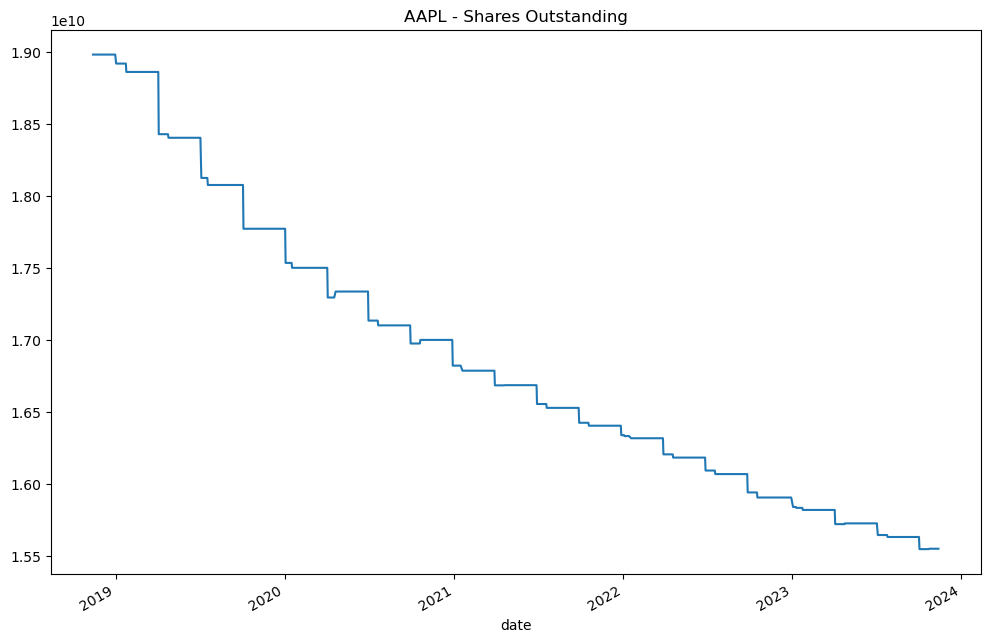

In [40]:
df.shares.plot(figsize = (12, 8))
plt.title("AAPL - Shares Outstanding")
plt.show()

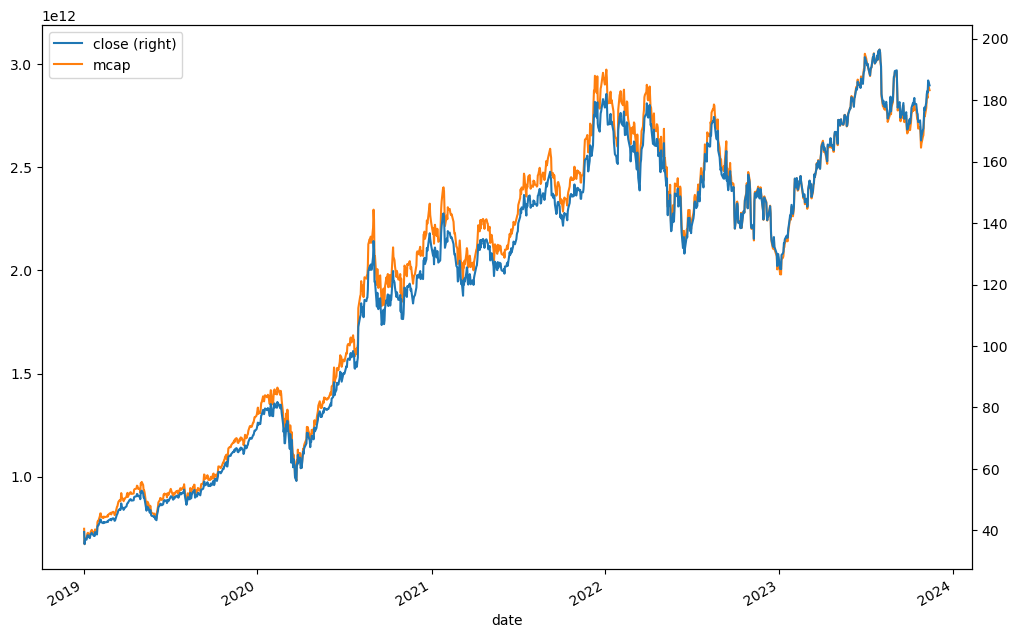

In [41]:
df.loc["2019":,["close", "mcap"]].plot(figsize = (12, 8), secondary_y = "close")
plt.show()

---

# Intraday Data

In [42]:
client

In [43]:
#1 hour
pd.DataFrame(client.get_prices_intraday(symbol, interval = "1h")) 

,timestamp,gmtoffset,datetime,open,high,low,close,volume
0,1689687000,0,2023-07-18 13:30:00,193.020004,193.490005,192.794998,192.985000,9908873.0
1,1689690600,0,2023-07-18 14:30:00,193.000000,193.654998,192.889999,193.145004,4922994.0
2,1689694200,0,2023-07-18 15:30:00,193.145004,193.259994,192.570007,192.705001,6601926.0
3,1689697800,0,2023-07-18 16:30:00,192.699996,192.939895,192.414993,192.934997,4346575.0
4,1689701400,0,2023-07-18 17:30:00,192.940002,193.789993,192.899993,193.759994,3752506.0
...,...,...,...,...,...,...,...,...
668,1699896600,0,2023-11-13 17:30:00,184.570007,184.929901,184.389999,184.559997,2665925.0
669,1699900200,0,2023-11-13 18:30:00,184.570007,185.009994,184.460006,184.990097,2982413.0
670,1699903800,0,2023-11-13 19:30:00,184.990005,185.080001,184.729904,184.949996,3878074.0
671,1699907400,0,2023-11-13 20:30:00,184.960006,185.009994,184.610504,184.770004,4422642.0


In [44]:
# 1 minute
pd.DataFrame(client.get_prices_intraday(symbol, interval = "1m")) 

,timestamp,gmtoffset,datetime,open,high,low,close,volume
0,1689667200,0,2023-07-18 08:00:00,193.820,193.82,193.80,193.800,3550
1,1689667260,0,2023-07-18 08:01:00,193.850,193.85,193.85,193.850,384
2,1689667320,0,2023-07-18 08:02:00,193.800,193.80,193.80,193.800,642
3,1689667380,0,2023-07-18 08:03:00,193.800,193.80,193.80,193.800,1090
4,1689667500,0,2023-07-18 08:05:00,193.850,193.85,193.85,193.850,230
...,...,...,...,...,...,...,...,...
80022,1699923300,0,2023-11-14 00:55:00,184.900,184.94,184.90,184.925,63
80023,1699923360,0,2023-11-14 00:56:00,184.940,184.95,184.90,184.950,973
80024,1699923420,0,2023-11-14 00:57:00,184.950,185.00,184.95,184.990,772
80025,1699923480,0,2023-11-14 00:58:00,185.000,185.02,184.95,184.950,249


---

# Live Data

In [57]:
# Get real time data 
pd.Series(client.get_prices_live(symbol))

code                AAPL.US
timestamp        1699909200
gmtoffset                 0
open                 185.82
high                 186.03
low                  184.21
close                184.77
volume             35864444
previousClose         186.4
change                -1.63
change_p            -0.8745
dtype: object

In [46]:
pd.to_datetime(pd.Series(client.get_prices_live(symbol)).timestamp, unit = "s")

Timestamp('2023-11-13 21:00:00')

---

# Exchanges and Ticker Symbols

__Note: The following API Calls won´t work with the Demo!__

https://eodhd.com/cp/settings

Action required: Please register and get 
- 20 API Calls per day with the __Free Package__! -or-
- 100,000 API Calls per day with the EOD Historical Data — __All World Package__

In [86]:
token = "65537a37b76cd6.98997558"
client = EodHistoricalData(token)
client

In [87]:
exch = pd.DataFrame(client.get_exchanges())
exch

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
0,USA Stocks,US,"XNAS, XNYS",USA,USD,US,USA
1,London Exchange,LSE,XLON,UK,GBP,GB,GBR
2,NEO Exchange,NEO,NEOE,Canada,CAD,CA,CAN
3,TSX Venture Exchange,V,XTSX,Canada,CAD,CA,CAN
4,Toronto Exchange,TO,XTSE,Canada,CAD,CA,CAN
...,...,...,...,...,...,...,...
73,Money Market Virtual Exchange,MONEY,None,Unknown,Unknown,,
74,Europe Fund Virtual Exchange,EUFUND,None,Unknown,EUR,,
75,Istanbul Stock Exchange,IS,XIST,Turkey,TRY,TR,TUR
76,FOREX,FOREX,CDSL,Unknown,Unknown,,


In [88]:
exch.head(60)

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
0,USA Stocks,US,"XNAS, XNYS",USA,USD,US,USA
1,London Exchange,LSE,XLON,UK,GBP,GB,GBR
2,NEO Exchange,NEO,NEOE,Canada,CAD,CA,CAN
3,TSX Venture Exchange,V,XTSX,Canada,CAD,CA,CAN
4,Toronto Exchange,TO,XTSE,Canada,CAD,CA,CAN
5,Berlin Exchange,BE,XBER,Germany,EUR,DE,DEU
6,Hamburg Exchange,HM,XHAM,Germany,EUR,DE,DEU
7,XETRA Exchange,XETRA,XETR,Germany,EUR,DE,DEU
8,Dusseldorf Exchange,DU,XDUS,Germany,EUR,DE,DEU
9,Munich Exchange,MU,XMUN,Germany,EUR,DE,DEU


In [ ]:
client.get_exchange_details("US")

In [92]:
us = pd.DataFrame(client.get_exchange_symbols("US"))
us

,Code,Name,Country,Exchange,Currency,Type,Isin
0,0P0000A412,Franklin U.S. Opportunities Fund A,USA,US,USD,FUND,None
1,0P0000RX5G,Franklin Floating Rate Fund PLC W USD Dis,USA,US,GBP,FUND,None
2,0P0001MKQU,WCM Select Global Growth Equity Fund I/A USD A...,USA,US,USD,FUND,None
3,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
4,AA,Alcoa Corp,USA,NYSE,USD,Common Stock,US0138721065
...,...,...,...,...,...,...,...
49103,ZYME,Zymeworks Inc. Common Stock,USA,NASDAQ,USD,Common Stock,CA98985W1023
49104,ZYXI,Zynex Inc,USA,NASDAQ,USD,Common Stock,US98986M1036
49105,ZZHGF,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None
49106,ZZHGY,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None


In [93]:
us.Exchange.value_counts()

Exchange
NMFQS        25664
PINK          9253
NASDAQ        5370
NYSE          2985
NYSE ARCA     2139
OTCQB         1118
BATS           667
OTCQX          605
OTCGREY        517
OTCCE          385
NYSE MKT       313
OTCMKTS         42
US              33
AMEX             4
OTC              2
Name: count, dtype: int64

In [94]:
nyse = pd.DataFrame(client.get_exchange_symbols("NYSE"))
nyse

,Code,Name,Country,Exchange,Currency,Type,Isin
0,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
1,AA,Alcoa Corp,USA,NYSE,USD,Common Stock,US0138721065
2,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,US53656F6566
3,AAC,AAC Holdings Inc,USA,NYSE,USD,Common Stock,KYG330321061
4,AAC-WT,Ares Acquisition Corporation Re,USA,NYSE,USD,Common Stock,None
...,...,...,...,...,...,...,...
5432,ZTR,Virtus Global Dividend and Income Fund Inc,USA,NYSE,USD,FUND,US92835W1071
5433,ZTS,Zoetis Inc,USA,NYSE,USD,Common Stock,US98978V1035
5434,ZUO,Zuora Inc,USA,NYSE,USD,Common Stock,US98983V1061
5435,ZVIA,Zevia Pbc,USA,NYSE,USD,Common Stock,US98955K1043


In [95]:
us.Type.value_counts()

Type
FUND               24899
Common Stock       18678
ETF                 3601
Mutual Fund         1188
Preferred Stock      537
Unit                 199
Note                   3
ETC                    2
Bond                   1
Name: count, dtype: int64

In [96]:
us[us.Name.str.contains("Apple")]

,Code,Name,Country,Exchange,Currency,Type,Isin
195,AAPL,Apple Inc,USA,NASDAQ,USD,Common Stock,US0378331005
198,AAPY,Kurv Yield Premium Strategy Apple (AAPL) ETF,USA,BATS,USD,ETF,None
2361,APLE,Apple Hospitality REIT Inc,USA,NYSE,USD,Common Stock,US03784Y2000
2418,APRU,Apple Rush Company,USA,PINK,USD,Common Stock,US03785R2040
17024,GAPJ,Golden Apple Oil & Gas Inc,USA,PINK,USD,Common Stock,None


In [97]:
etf = us[us.Type == "ETF"].copy()
etf

,Code,Name,Country,Exchange,Currency,Type,Isin
5,AAA,Listed Funds Trust - AAF First Priority CLO Bo...,USA,NYSE ARCA,USD,ETF,US53656F6566
24,AAAU,Goldman Sachs Physical Gold ETF,USA,BATS,USD,ETF,US38150K1034
92,AADR,AdvisorShares Dorsey Wright ADR ETF,USA,NASDAQ,USD,ETF,US00768Y2063
192,AAPB,GraniteShares ETF Trust - GraniteShares 2x Lon...,USA,NASDAQ,USD,ETF,US38747R8842
193,AAPD,Direxion Shares ETF Trust - Direxion Daily AAP...,USA,NASDAQ,USD,ETF,US25461A3041
...,...,...,...,...,...,...,...
49059,ZSB,USCF Sustainable Battery Metals Strategy Fund,USA,NYSE,USD,ETF,US90290T8412
49060,ZSC,USCF ETF Trust,USA,None,USD,ETF,None
49064,ZSILF,ZKB Silver ETF,USA,OTCGREY,USD,ETF,None
49065,ZSL,ProShares UltraShort Silver,USA,NYSE ARCA,USD,ETF,US74347Y8479


In [98]:
etf[etf.Name.str.contains("MSCI World")].tail(60)

,Code,Name,Country,Exchange,Currency,Type,Isin
21277,IEMXF,iShares Edge MSCI World Minimum Volatility UCITS,USA,OTCGREY,USD,ETF,IE00B8FHGS14
21570,IIREF,iShares Public Limited Company - iShares MSCI ...,USA,PINK,USD,ETF,None
21797,IMWEF,iShares IV Public Limited Company - iShares MS...,USA,OTCGREY,USD,ETF,None
21798,IMWSF,iShares III plc - iShares MSCI World Small Cap...,USA,OTCGREY,USD,ETF,None
22247,IRRRF,iShares III Public Limited Company - iShares C...,USA,OTCGREY,USD,ETF,None
22361,ISHWF,iShares II Public Limited Company - iShares MS...,USA,PINK,USD,ETF,None
22391,ISMVF,iShares IV Public Limited Company - iShares Ed...,USA,PINK,USD,ETF,None
22433,ISQWF,iShares IV Public Limited Company - iShares Ed...,USA,PINK,USD,ETF,None
22800,IWVUF,iShares IV Public Limited Company - iShares Ed...,USA,OTCMKTS,USD,ETF,None
36730,QWLD,SPDR® MSCI World StrategicFactors ETF,USA,NYSE ARCA,USD,ETF,US78463X4189


In [99]:
nse = pd.DataFrame(client.get_exchange_symbols("NSE"))
nse

,Code,Name,Country,Exchange,Currency,Type,Isin
0,20MICRONS,20 Microns Limited,India,NSE,INR,Common Stock,INE144J01027
1,21STCENMGM,21st Century Management Services Limited,India,NSE,INR,Common Stock,INE253B01015
2,360ONE,360 ONE WAM LIMITED,India,NSE,INR,Common Stock,INE466L01038
3,3IINFOLTD,3i Infotech Limited,India,NSE,INR,Common Stock,INE748C01038
4,3MINDIA,3M India Limited,India,NSE,INR,Common Stock,INE470A01017
...,...,...,...,...,...,...,...
2069,ZOTA,Zota Health Care LImited,India,NSE,INR,Common Stock,INE358U01012
2070,ZUARI,Zuari Agro Chemicals Limited,India,NSE,INR,Common Stock,INE840M01016
2071,ZUARIIND,ZUARI INDUSTRIES LIMITED,India,NSE,INR,Common Stock,INE217A01012
2072,ZYDUSLIFE,Zydus Lifesciences Limited,India,NSE,INR,Common Stock,INE010B01027


In [100]:
nse.Type.value_counts()

Type
Common Stock    1935
ETF              139
Name: count, dtype: int64

---

# Delisted Stocks

In [101]:
pd.DataFrame(client.get_exchange_symbols("US", delisted = 0)) # default 

,Code,Name,Country,Exchange,Currency,Type,Isin
0,0P0000A412,Franklin U.S. Opportunities Fund A,USA,US,USD,FUND,None
1,0P0000RX5G,Franklin Floating Rate Fund PLC W USD Dis,USA,US,GBP,FUND,None
2,0P0001MKQU,WCM Select Global Growth Equity Fund I/A USD A...,USA,US,USD,FUND,None
3,A,Agilent Technologies Inc,USA,NYSE,USD,Common Stock,US00846U1016
4,AA,Alcoa Corp,USA,NYSE,USD,Common Stock,US0138721065
...,...,...,...,...,...,...,...
49103,ZYME,Zymeworks Inc. Common Stock,USA,NASDAQ,USD,Common Stock,CA98985W1023
49104,ZYXI,Zynex Inc,USA,NASDAQ,USD,Common Stock,US98986M1036
49105,ZZHGF,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None
49106,ZZHGY,ZhongAn Online P & C Insurance Co. Ltd,USA,PINK,USD,Common Stock,None


In [102]:
pd.DataFrame(client.get_exchange_symbols("US", delisted = 1)) # delisted symbols

,Code,Name,Country,Exchange,Currency,Type,Isin
0,-P-S,-P-S,USA,NYSE,USD,Preferred Stock,None
1,!DJI,TRS DJ Industrial Average PR USD,USA,None,USD,Common Stock,None
2,00779G392,00779G392,USA,NMFQS,USD,Mutual Fund,None
3,0NPP,Koninklijke DSM NV,USA,None,USD,Common Stock,None
4,1836930D,AMALGAMATED BANK,USA,None,USD,Common Stock,None
...,...,...,...,...,...,...,...
58856,ZZLLD,ZZLL Information Technology Inc,USA,OTCBB,USD,Common Stock,None
58857,ZZPWF,ZZPWF,USA,OTCGREY,USD,Common Stock,None
58858,ZZZ,TEST TICKER FOR UTP,USA,NYSE ARCA,USD,Common Stock,None
58859,ZZZOD,Zinc One Resources Inc,USA,PINK,USD,Common Stock,None


In [103]:
pd.DataFrame(client.get_prices_eod("ZYTO.US", period = "d")) # prices for delisted symbols

""


---

# Index and Index Constituents

In [104]:
client # with account token

In [105]:
pd.DataFrame(client.get_exchanges()).tail(20)

,Name,Code,OperatingMIC,Country,Currency,CountryISO2,CountryISO3
58,Karachi Stock Exchange,KAR,XKAR,Pakistan,PKR,PK,PAK
59,Australia Exchange,AU,XASX,Australia,AUD,AU,AUS
60,Colombo Stock Exchange,CM,XCOL,Sri Lanka,LKR,LK,LKA
61,Vietnam Stocks,VN,HSTC,Vietnam,VND,VN,VNM
62,Kuala Lumpur Exchange,KLSE,XKLS,Malaysia,MYR,MY,MYS
63,Buenos Aires Exchange,BA,XBUE,Argentina,ARS,AR,ARG
64,Bucharest Stock Exchange,RO,XBSE,Romania,RON,RO,ROU
65,Sao Paolo Exchange,SA,BVMF,Brazil,BRL,BR,BRA
66,Mexican Exchange,MX,XMEX,Mexico,MXN,MX,MEX
67,London IL,IL,XLON,UK,USD,GB,GBR


In [ ]:
client.get_exchange_details("INDX") 

In [107]:
df = pd.DataFrame(client.get_exchange_symbols("INDX")) # list with indices
df

,Code,Name,Country,Exchange,Currency,Type,Isin
0,000906,China Securities 800,China,INDX,CNY,INDEX,None
1,0GZE,RICI Enhanced Gas Oil Excess Return Index,Germany,INDX,EUR,INDEX,DE000PZ9RED2
2,0GZF,RICI Enhanced Gasoline Excess Return Index,Germany,INDX,EUR,INDEX,DE000PZ9RE14
3,0GZG,RICI Enhanced Heating Oil Excess Return Index,Germany,INDX,EUR,INDEX,DE000PZ9REH3
4,0GZH,RICI Enhanced Aluminum Excess Return Index,Germany,INDX,EUR,INDEX,DE000PZ9REA8
...,...,...,...,...,...,...,...
949,XU030,BIST 30,Turkey,INDX,TRY,INDEX,None
950,XU100,BIST 100,Turkey,INDX,TRY,INDEX,None
951,XUSIN,BIST Industrials,Turkey,INDX,TRY,INDEX,None
952,XUSRD,BIST Sustainability,Turkey,INDX,TRY,INDEX,None


In [108]:
df[df.Name.str.contains("Russell 3000")]

,Code,Name,Country,Exchange,Currency,Type,Isin


In [109]:
df[df.Name.str.contains("Dow Jones Industrial Average")]

,Code,Name,Country,Exchange,Currency,Type,Isin
256,DJI,Dow Jones Industrial Average,USA,INDX,USD,INDEX,None


In [110]:
df[df.Name.str.contains("S&P 500")]

,Code,Name,Country,Exchange,Currency,Type,Isin
9,5SP2550,S&P 500 Retailing (Industry Group),USA,INDX,USD,INDEX,None
205,BXMD,CBOE S&P 500 30-Delta BuyWrite,USA,INDX,USD,INDEX,None
433,GSPC,S&P 500 Index,USA,INDX,USD,INDEX,US78378X1072
657,PUT,CBOE S&P 500 PutWrite Index,USA,INDX,USD,INDEX,None
672,S5FI,S&P 500 Stocks Above 50-Day Average,USA,INDX,USD,INDEX,None
673,S5TELS,S&P 500 Communication Services,USA,INDX,USD,INDEX,None
674,S5TH,S&P 500 Stocks Above 200-Day Average,USA,INDX,USD,INDEX,None
675,S5TW,S&P 500 Stocks Above 20-Day Average,USA,INDX,USD,INDEX,None
712,SP500-15,S&P 500 Materials (Sector),USA,INDX,USD,INDEX,None
713,SP500-151010,S&P 500 Chemicals,USA,INDX,USD,INDEX,None


In [111]:
index = "GSPC.INDX"

In [112]:
df = pd.DataFrame(client.get_prices_eod(index, period = "d")) # index prices S&P 500
df

,date,open,high,low,close,adjusted_close,volume
0,2022-11-14,3977.9700,4008.9700,3956.3999,3957.2500,3957.2500,4561930000
1,2022-11-15,4006.4099,4028.8401,3953.1699,3991.7300,3991.7300,5015310000
2,2022-11-16,3976.8201,3983.0901,3954.3401,3958.7900,3958.7900,4165320000
3,2022-11-17,3919.2600,3954.3301,3906.5400,3946.5601,3946.5601,4051780000
4,2022-11-18,3966.3899,3979.8899,3935.9800,3965.3401,3965.3401,4037360000
...,...,...,...,...,...,...,...
246,2023-11-07,4366.2100,4386.2598,4355.4102,4378.3799,4378.3799,3791230000
247,2023-11-08,4384.3701,4391.2002,4359.7598,4382.7798,4382.7798,3729510000
248,2023-11-09,4391.4102,4393.3999,4343.9399,4347.3501,4347.3501,3900780000
249,2023-11-10,4364.1499,4418.0298,4353.3398,4415.2402,4415.2402,3665080000


In [ ]:
info = pd.Series(client.get_fundamental_equity(index))
info

In [116]:
info.General

{'Code': 'AAPL',
 'Type': 'Common Stock',
 'Name': 'Apple Inc',
 'Exchange': 'NASDAQ',
 'CurrencyCode': 'USD',
 'CurrencyName': 'US Dollar',
 'CurrencySymbol': '$',
 'CountryName': 'USA',
 'CountryISO': 'US',
 'OpenFigi': 'BBG000B9XRY4',
 'ISIN': 'US0378331005',
 'LEI': 'HWUPKR0MPOU8FGXBT394',
 'PrimaryTicker': 'AAPL.US',
 'CUSIP': '037833100',
 'CIK': '320193',
 'EmployerIdNumber': '94-2404110',
 'FiscalYearEnd': 'September',
 'IPODate': '1980-12-12',
 'InternationalDomestic': 'International/Domestic',
 'Sector': 'Technology',
 'Industry': 'Consumer Electronics',
 'GicSector': 'Information Technology',
 'GicGroup': 'Technology Hardware & Equipment',
 'GicIndustry': 'Technology Hardware, Storage & Peripherals',
 'GicSubIndustry': 'Technology Hardware, Storage & Peripherals',
 'HomeCategory': 'Domestic',
 'IsDelisted': False,
 'Description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers i

In [ ]:
pd.DataFrame(info.Components).T

In [ ]:
comp = pd.DataFrame(info.HistoricalTickerComponents).T
comp

---

## Bulk Downloads (cross-sectional data)

In [114]:
client # with account token

__most recent trading day for all exchange symbols__

In [ ]:
pd.DataFrame(client.get_bulk_markets("US"))

__a specified trading day for all exchange symbols__

In [ ]:
pd.DataFrame(client.get_bulk_markets("US", date = "2022-10-12"))

__more details__

In [ ]:
pd.DataFrame(client.get_bulk_markets("US", date = "2022-10-12", filter_ = "extended"))